This is the best known dataset for doing classification. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

Predicted attributes: class of iris plant.

Attribute information:

- sepal length in cm 
- sepal width in cm
- petal length in cm 
- petal width in cm 
- class: Iris Sentosa, Iris Versicolour, Iris Virginica. 

## `IRIS` dataset in scikit-learn

`scikit-learn` includes this dataset, we can load it directly:


In [9]:
from sklearn import datasets 
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [10]:
y.shape

(150,)

The dataset is suitable for classification task. If using supervised learning, some algorithms that can be applied are: 

- Random Forest
- Logistic Regression
- Naive Bayes


## Visualization

This is adopted from: https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations

In [11]:
# import pandas, a data processing and CSV file I/O library
import pandas as pd 

# import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes = True)

%matplotlib inline

# Load the Iris flower dataset in CSV format
iris2 = pd.read_csv("dataset/iris.csv")

# Quick check
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# How many samples we have of each species 
iris2["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

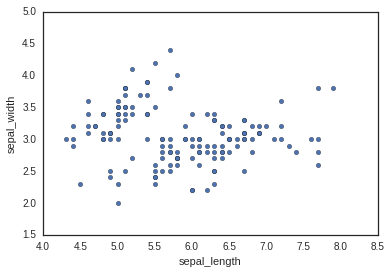

In [13]:
# The first way to plot things is using the .plot extension from Pandas dataframes
iris2.plot(kind="scatter", x =  "sepal_length", y = "sepal_width")

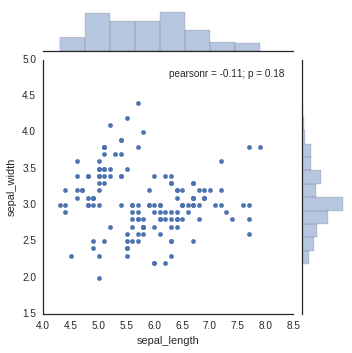

In [21]:
# use seaborn to plot a similar one 
# A seaborn jointplot shows bivariate scatterplots and univariate histogram in the same figure
sns.jointplot (x = "sepal_length", y = "sepal_width", data=iris2, size =5)

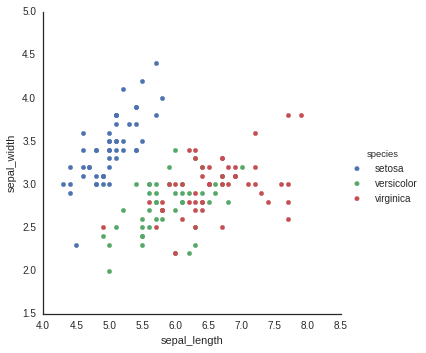

In [23]:
# Now use seaborn's FacetGrid to color the scatterplot by species 
sns.FacetGrid(iris2, hue= "species", size = 5).map(plt.scatter, "sepal_length", "sepal_width").add_legend()


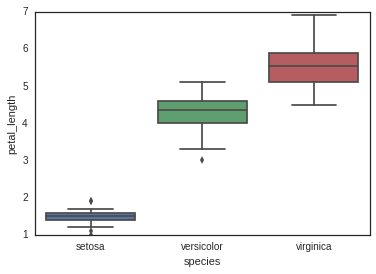

In [24]:
# Use boxplot to visualize individual feature
sns.boxplot(x = "species", y = "petal_length", data=iris2)

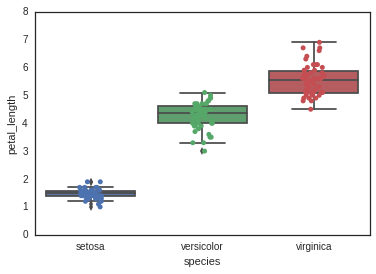

In [26]:
# We can extend this plot by adding a layer of individual points on top of it through Seaborn's triplot
# Use jitter=True so that all the points don't fall in single vertical lines above the species 
# saving the resulting axes as ax each time causes the resulting plots to be shown on top of the previous axes
ax = sns.boxplot(x="species", y = "petal_length", data = iris2)
ax = sns.stripplot(x="species", y="petal_length", data = iris2, jitter = True, edgecolor="gray")

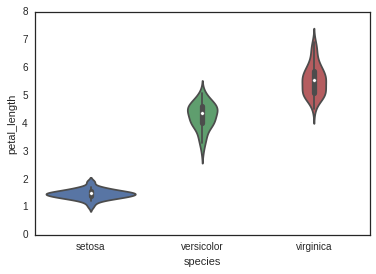

In [27]:
# A violin plot combines the benefits of the previous two plots and simplifies them.
# Denser region of the data are fatter, and sparser thinner in a violin plot
sns.violinplot(x="species", y = "petal_length", data = iris2, size =5)

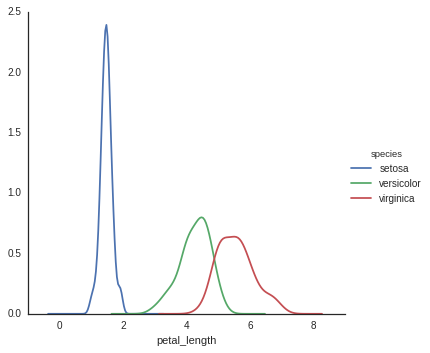

In [28]:
# Another useful seaborn plot for looking at univariate relations is the kdeplot, 
# which creates and visualizes a kernel density estimate of underlying features
sns.FacetGrid(iris2, hue="species", size=5)\
    .map(sns.kdeplot, "petal_length")\
    .add_legend()

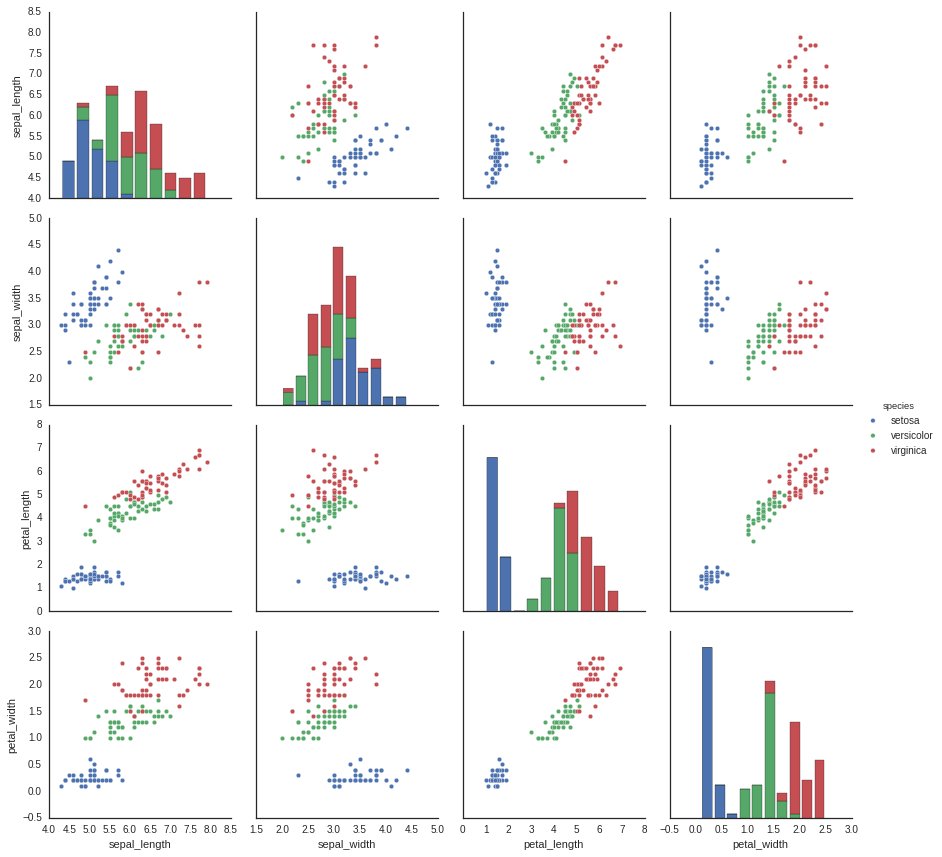

In [30]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features
# From the pairplot, we'll see that the Iris-setosa is separated from the other two accross all feature combinations
sns.pairplot(iris2, hue="species", size =3)

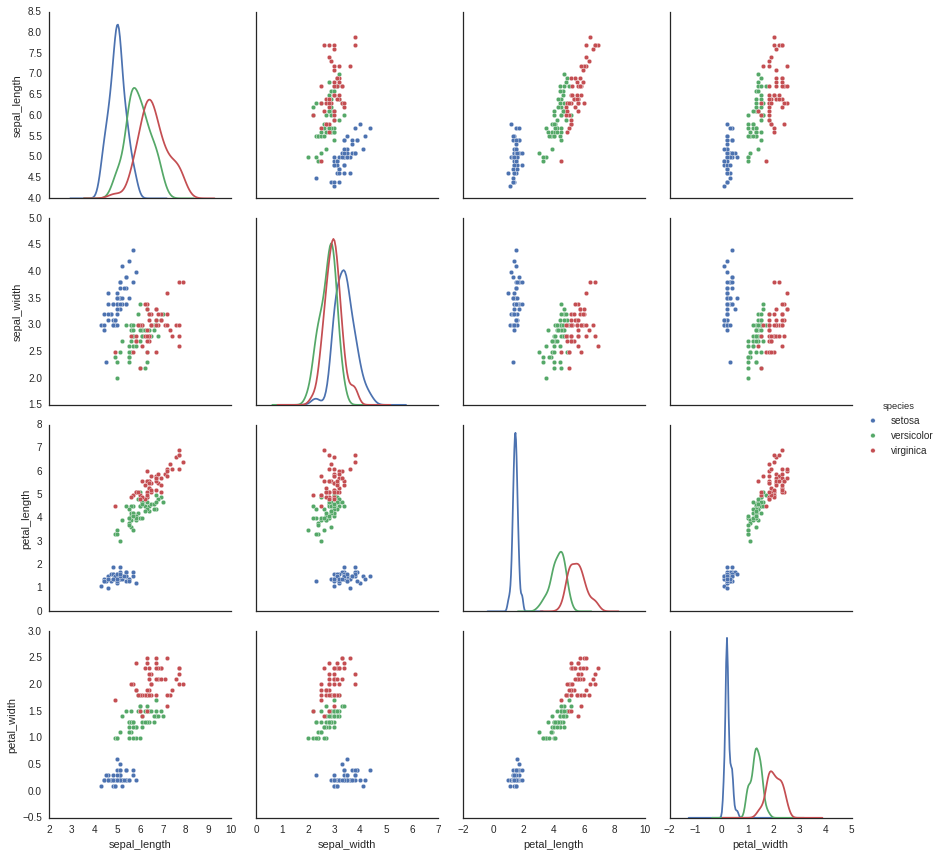

In [31]:
# The diagonal elements in a pairplot shows the histogram by default,
# but we can update these elements to show other things, such as kde
sns.pairplot(iris2, hue = "species", size = 3, diag_kind="kde")

In [14]:
import numpy as np
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)


## Apply Random Forests




In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [17]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [18]:
## Cross validation score
clf.score(X_test, y_test)

0.96666666666666667

## Using Cross Validation 



## To do 

- Apply some unsupervised learning algorithms on this dataset. 

## References
- http://archive.ics.uci.edu/ml/datasets/Iris